In [ ]:
pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 3.9 MB/s eta 0:00:00


In [ ]:
pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 45.4 MB/s eta 0:00:00


In [ ]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=4ffd4caa3a549cc62bb799e9c982f04e7ce7be0b7a79e35ecfe9593cb2200a5a
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [ ]:
from qiskit_aer import Aer
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.circuit.library import QFT , CCXGate
import numpy as np
import matplotlib.pyplot as plt

# XOR NOT

In [ ]:
# Create a Quantum Circuit with the appropriate number of qubits
n = 3  # Example number of qubits based on the diagram, adjust as needed
qc = QuantumCircuit(n,1)

# qc.CCXGate(0,1,2)
# # qc.x(0)
# qc.x(1)

ccx_gate = CCXGate()
qc.append(ccx_gate, [0, 1, 2])

qc.x(0)
qc.x(1)
# qc.x(2)
qc.append(ccx_gate, [0, 1, 2])

qc.x(0)
qc.x(1)
# Apply CNOT gates based on the pattern in the diagram
# This is an example, adjust according to the specific gates and connections
# qc.cx(0, 1)
# qc.cx(1, 2)
# qc.cx(0, 2)

# Add measurement
# qc.measure_all()
# qc.measure(0,0)
# qc.measure(1,1)
qc.measure(2,0)

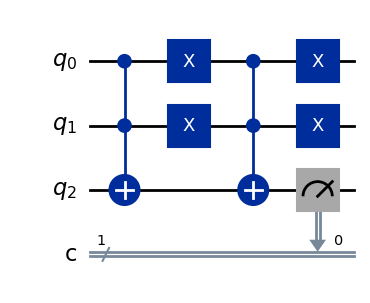

In [ ]:
qc.draw('mpl')


Total count for each state are: {'1': 1024}


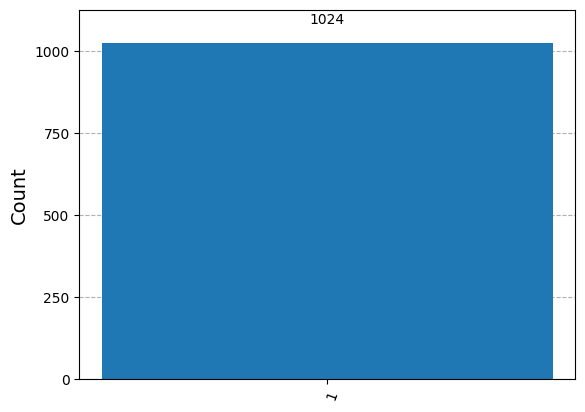

In [ ]:
# Execute the circuit on a simulator
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(qc, simulator)
qobj = assemble(compiled_circuit)
result = simulator.run(qc, backend=simulator).result()

# Get the measurement results
counts = result.get_counts(qc)
print("\nTotal count for each state are:", counts)

# Plot the results
plot_histogram(counts)

# CNOTs

In [ ]:
# Create a Quantum Circuit with the appropriate number of qubits
n = 3  # Example number of qubits based on the diagram, adjust as needed
qc = QuantumCircuit(n,1)

# qc.CCXGate(0,1,2)
# # qc.x(0)
# qc.x(1)

ccx_gate = CCXGate()
qc.append(ccx_gate, [0, 1, 2])

qc.x(0)
qc.x(1)
# qc.x(2)
qc.append(ccx_gate, [0, 1, 2])

qc.x(0)
qc.x(1)
# Apply CNOT gates based on the pattern in the diagram
# This is an example, adjust according to the specific gates and connections
qc.barrier()
qc.cx(0, 1)
# qc.cx(1, 2)
# qc.cx(0, 2)

# Add measurement
# qc.measure_all()
# qc.measure(0,0)
# qc.measure(1,1)
qc.measure(2,0)

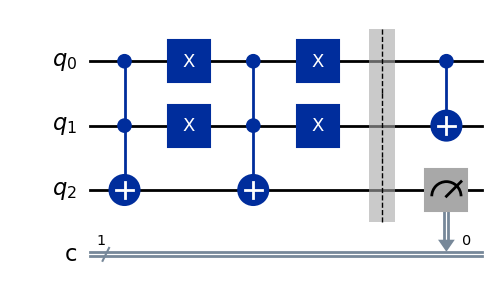

In [ ]:
qc.draw('mpl')


Total count for each state are: {'1': 1024}


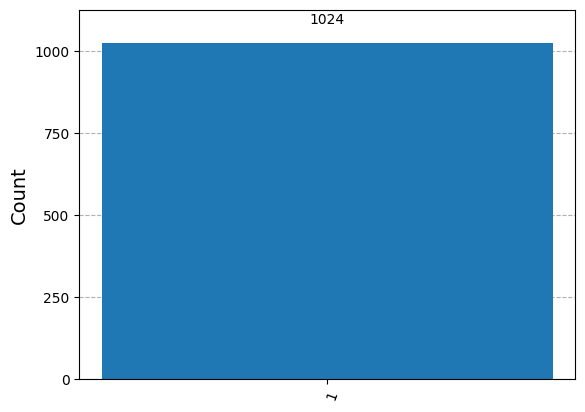

In [ ]:
# Execute the circuit on a simulator
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(qc, simulator)
qobj = assemble(compiled_circuit)
result = simulator.run(qc, backend=simulator).result()

# Get the measurement results
counts = result.get_counts(qc)
print("\nTotal count for each state are:", counts)

# Plot the results
plot_histogram(counts)

# Single shot with loop


Total count for each state are: {'1': 1}


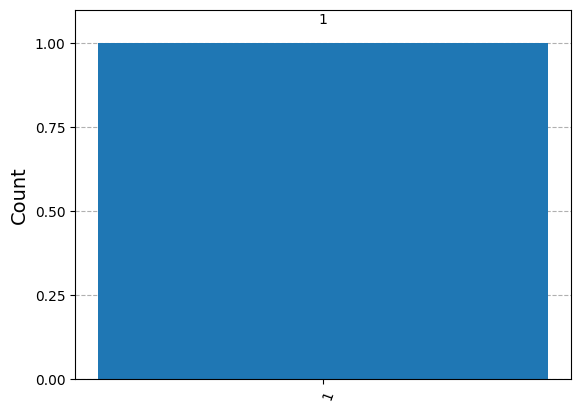

In [ ]:
# Create a Quantum Circuit with 3 qubits and 1 classical bit
qc = QuantumCircuit(3, 1)

# Apply some gates to the qubits (this is just an example)
qc.h(0)
qc.cx(0, 1)
qc.cx(1, 2)

# Measure only the second qubit (index 2) and store the result in the first classical bit
qc.measure(2, 0)

# Execute the circuit on a simulator
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(qc, simulator)
qobj = assemble(compiled_circuit)

# Run the circuit in a loop until the desired state is obtained
desired_state = '1'  # We want the second qubit to be in state |1⟩
result_counts = None

while True:
    result = simulator.run(qc, backend=simulator, shots=1).result()
    result_counts = result.get_counts(qc)

    # Check if the desired state is obtained
    if desired_state in result_counts:
        break

# Print the result
print("\nTotal count for each state are:", result_counts)

# Plot the results
plot_histogram(result_counts)

In [ ]:
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector

# Create a Quantum Circuit with the appropriate number of qubits
n = 3  # Example number of qubits based on the diagram, adjust as needed
qc = QuantumCircuit(n,1)

# qc.CCXGate(0,1,2)
# qc.x(0)
# qc.x(1)

ccx_gate = CCXGate()
qc.append(ccx_gate, [0, 1, 2])

qc.x(0)
qc.x(1)
# qc.x(2)
qc.append(ccx_gate, [0, 1, 2])

qc.x(0)
qc.x(1)
# Apply CNOT gates based on the pattern in the diagram
# This is an example, adjust according to the specific gates and connections
qc.barrier()
qc.cx(0, 1)
# qc.cx(1, 2)
# qc.cx(0, 2)

# Add measurement
# qc.measure_all()
# qc.measure(0,0)
# qc.measure(1,1)
qc.measure(2,0)

# Execute the circuit on a simulator
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(qc, simulator)
qobj = assemble(compiled_circuit)

# Run the circuit in a loop until the desired state is obtained
desired_state = '1'  # We want the second qubit to be in state |1⟩
result_counts = None

while True:
    result = simulator.run(qc, backend=simulator, shots=1).result()
    result_counts = result.get_counts(qc)

    # Check if the desired state is obtained
    if desired_state in result_counts:
        break

# Print the result
print("\nTotal count for each state are:", result_counts)

# Plot the results
plot_histogram(result_counts)

# Add a snapshot instruction to save the statevector
qc.save_statevector()
# Use the AerSimulator with statevector method
simulator = AerSimulator(method="statevector")

# Get the statevector
statevector = result.data()['statevector']
print("Statevector: ", statevector)


Total count for each state are: {'1': 1}


KeyError: 'statevector'

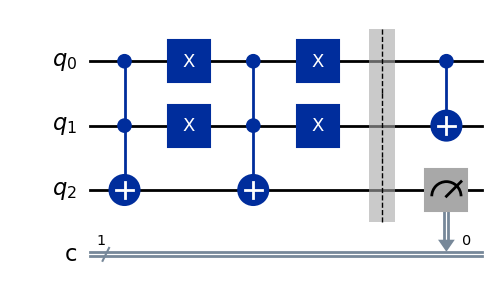

In [ ]:
qc.draw('mpl')

In [ ]:
# from qiskit import QuantumCircuit, Aer, transpile, assemble, execute
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram

# Create a Quantum Circuit with the appropriate number of qubits
n = 3  # Example number of qubits based on the diagram, adjust as needed
qc = QuantumCircuit(n,1)

# qc.CCXGate(0,1,2)
qc.x(0)
qc.x(1)

ccx_gate = CCXGate()
qc.append(ccx_gate, [0, 1, 2])

qc.x(0)
qc.x(1)
# qc.x(2)
qc.append(ccx_gate, [0, 1, 2])

qc.x(0)
qc.x(1)
# Apply CNOT gates based on the pattern in the diagram
# This is an example, adjust according to the specific gates and connections
qc.barrier()
qc.cx(0, 1)
# qc.cx(1, 2)
# qc.cx(0, 2)

# Add measurement
# qc.measure_all()
# qc.measure(0,0)
# qc.measure(1,1)
qc.measure(2,0)
# Execute the circuit on a simulator
simulator = Aer.get_backend('qasm_simulator')
state_simulator = Aer.get_backend('statevector_simulator')

compiled_circuit = transpile(qc, simulator)

# Run the circuit in a loop until the desired state is obtained
desired_state = '1'  # We want the second qubit to be in state |1⟩
result_counts = None

while True:
    result = simulator.run(qc, backend=simulator, shots=1).result()
    result_counts = result.get_counts(qc)

    # Check if the desired state is obtained
    if desired_state in result_counts:
        break

# Print the result
print("\nTotal count for each state are:", result_counts)

# Plot the results
plot_histogram(result_counts)

# Remove measurement from the original circuit to get the statevector
qc.remove_final_measurements()

# Get the statevector after the measurement
statevector = Statevector.from_instruction(qc)

print("\nStatevector after measurement (for the remaining qubits):")
print(statevector)

# Visualize the statevector
statevector.draw(output='latex')



Total count for each state are: {'1': 1}

Statevector after measurement (for the remaining qubits):
Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


<IPython.core.display.Latex object>

# Conv test

In [ ]:
# testing windowed state prep
window_scaling= 2.0062463823972267
padded_result_coeffs= [ 2.84459484e-01, -1.60769035e-01, -6.52830735e-01, -1.40302564e-01,
  4.04440838e-01, -5.49152208e-02, -5.29882315e-01,  7.34968555e-16,
  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00]
filter_scaling= 0.48685999869309116
padded_filter_vector= [-0.0020939558974013665, 0.04493999659839265, 0.267769868918511, 0.5812076801643039, 0.6512469871508397, 0.39116353951309446, 0.10554509675346828, 0.014199348776285179, 0, 0, 0, 0, 0, 0, 0, 0]

num_qubits = int(np.log2(len(padded_result_coeffs)))
qc_test = QuantumCircuit(num_qubits * 3, num_qubits * 3) #Increased from num_qubits*2 to num_qubits*3 for ancilla

# regular initialiazation
# qc_test.initialize(padded_result_coeffs, range(num_qubits))
# qc_test.initialize(padded_filter_vector, range(num_qubits, 2 * num_qubits))


# # inverted initilization
qc_test.initialize(padded_result_coeffs, range(num_qubits, 2 * num_qubits))
qc_test.initialize(padded_filter_vector, range(num_qubits) )

# qc_test.append(QFT(num_qubits), range(num_qubits))
# qc_test.append(QFT(num_qubits), range(num_qubits, 2 * num_qubits))

######### new code goes here #################
qc_test.barrier()

ccx_gate = CCXGate()
# qc.append(ccx_gate, [0, 1, 2])

for i in range(num_qubits):
    qc_test.append(ccx_gate, [i, i + num_qubits, i + 2*num_qubits])
    qc_test.x(i)
    qc_test.x(i + num_qubits)
    qc_test.append(ccx_gate, [i, i + num_qubits, i + 2*num_qubits])
    qc_test.x(i)
    qc_test.x(i + num_qubits)
qc_test.barrier()
#########################

for i in range(num_qubits):
    qc_test.cx(i, num_qubits + i)
    # qc_test.cx(num_qubits + i, i)

# qc_test.append(QFT(num_qubits, inverse=True).to_gate(), range(num_qubits))
# qc_test.append(QFT(num_qubits, inverse=True), range(num_qubits, 2 * num_qubits))
##################

qc_test.measure(range(2*num_qubits, 3 * num_qubits),range(2*num_qubits, 3 * num_qubits))

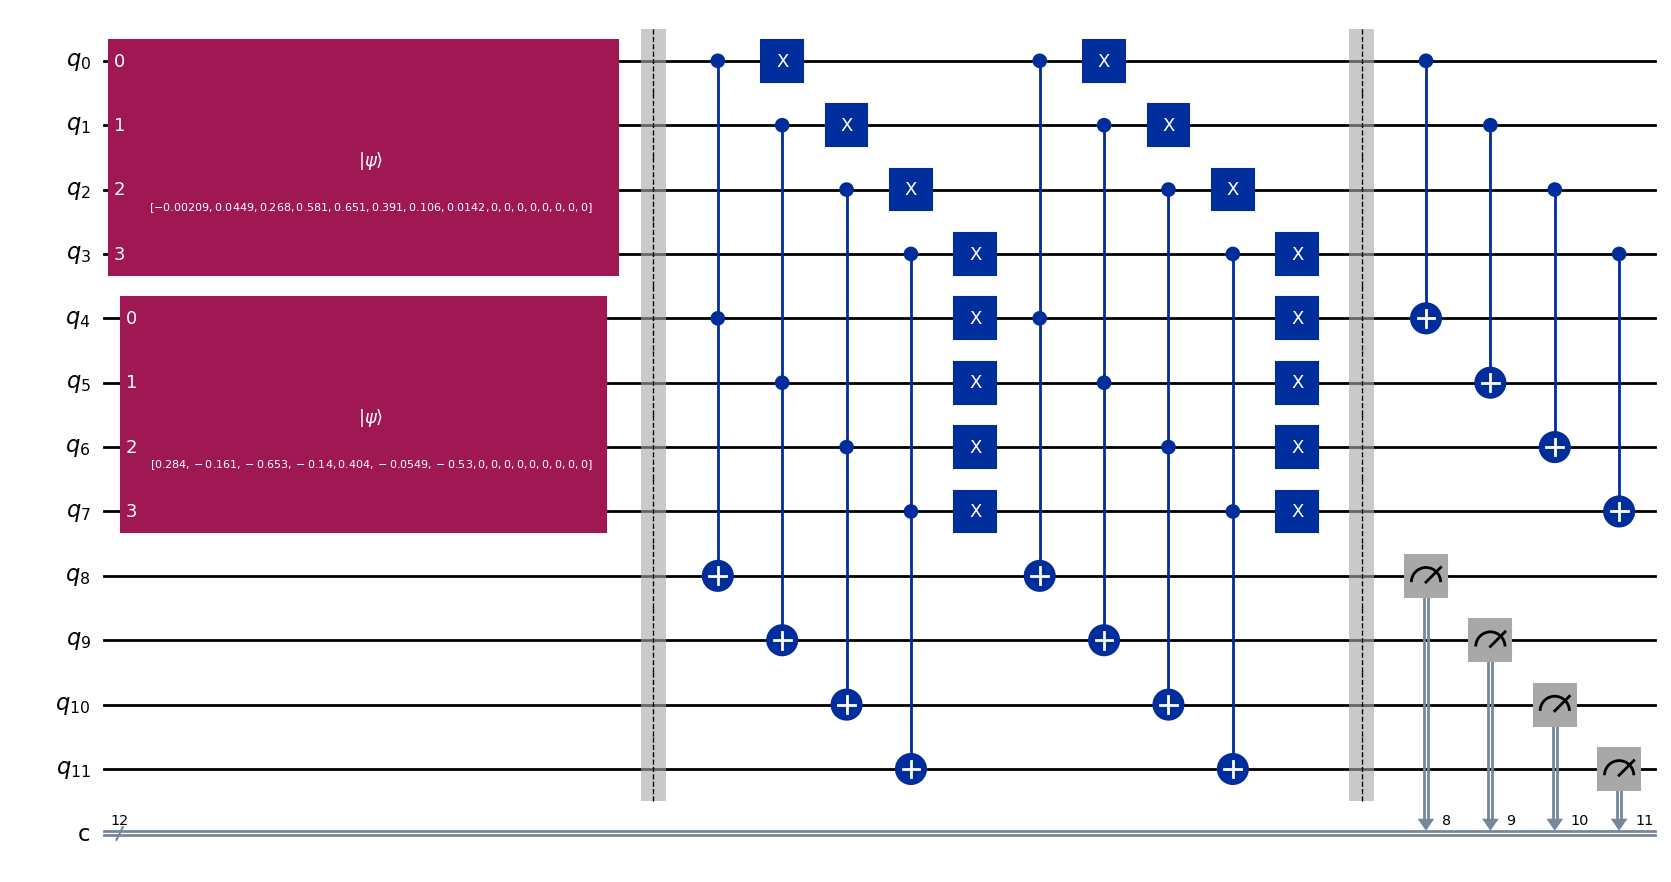

In [ ]:
qc_test.draw('mpl')

In [ ]:
# issues with loop not converging due tro measment qubits being higher

# Initialize parameters
window_scaling = 2.0062463823972267
padded_result_coeffs = [
    2.84459484e-01, -1.60769035e-01, -6.52830735e-01, -1.40302564e-01,
    4.04440838e-01, -5.49152208e-02, -5.29882315e-01,  7.34968555e-16,
    0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
    0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00
]
filter_scaling = 0.48685999869309116
padded_filter_vector = [
    -0.0020939558974013665, 0.04493999659839265, 0.267769868918511, 0.5812076801643039,
    0.6512469871508397, 0.39116353951309446, 0.10554509675346828, 0.014199348776285179,
    0, 0, 0, 0, 0, 0, 0, 0
]

num_qubits = int(np.log2(len(padded_result_coeffs)))
qc_test = QuantumCircuit(num_qubits * 3, num_qubits * 3)  # Increased from num_qubits*2 to num_qubits*3 for ancilla

# Inverted initialization
qc_test.initialize(padded_result_coeffs, range(num_qubits, 2 * num_qubits))
qc_test.initialize(padded_filter_vector, range(num_qubits))

# New code with CCX gates
qc_test.barrier()

ccx_gate = CCXGate()
for i in range(num_qubits):
    qc_test.append(ccx_gate, [i, i + num_qubits, i + 2 * num_qubits])
    qc_test.x(i)
    qc_test.x(i + num_qubits)
    qc_test.append(ccx_gate, [i, i + num_qubits, i + 2 * num_qubits])
    qc_test.x(i)
    qc_test.x(i + num_qubits)

qc_test.barrier()

for i in range(num_qubits):
    qc_test.cx(i, num_qubits + i)

qc_test.measure(range(2 * num_qubits, 3 * num_qubits), range(2 * num_qubits, 3 * num_qubits))

# Execute the circuit on a simulator
simulator = Aer.get_backend('qasm_simulator')
state_simulator = Aer.get_backend('statevector_simulator')

compiled_circuit = transpile(qc_test, simulator)

# Run the circuit in a loop until the desired state is obtained
desired_state = '1' * num_qubits  # All 1s in the measured register
result_counts = None

while True:
    result = simulator.run(qc_test, backend=simulator, shots=1).result()
    result_counts = result.get_counts(qc_test)
    print(result_counts)

    # Check if the desired state is obtained
    if desired_state in result_counts:
        break

# Print the result
print("\nTotal count for each state are:", result_counts)

# Plot the results
plot_histogram(result_counts)

# Remove measurement from the original circuit to get the statevector
qc_test.remove_final_measurements()

# Get the statevector after the measurement
statevector = Statevector.from_instruction(qc_test)

print("\nStatevector after measurement (for the remaining qubits):")
print(statevector)

# Visualize the statevector
statevector.draw(output='latex')


Streaming output truncated to the last 5000 lines.
{'110100000000': 1}
{'110100000000': 1}
{'111000000000': 1}
{'100100000000': 1}
{'111000000000': 1}
{'100100000000': 1}
{'100000000000': 1}
{'101100000000': 1}
{'101100000000': 1}
{'100000000000': 1}
{'111000000000': 1}
{'111100000000': 1}
{'100100000000': 1}
{'100000000000': 1}
{'101000000000': 1}
{'110000000000': 1}
{'100000000000': 1}
{'111000000000': 1}
{'110100000000': 1}
{'110000000000': 1}
{'110000000000': 1}
{'111000000000': 1}
{'110100000000': 1}
{'100000000000': 1}
{'111100000000': 1}
{'100100000000': 1}
{'101000000000': 1}
{'101000000000': 1}
{'100000000000': 1}
{'101100000000': 1}
{'111000000000': 1}
{'111100000000': 1}
{'110100000000': 1}
{'110100000000': 1}
{'101100000000': 1}
{'111100000000': 1}
{'100100000000': 1}
{'111000000000': 1}
{'100000000000': 1}
{'100000000000': 1}
{'101000000000': 1}
{'100100000000': 1}
{'111100000000': 1}
{'100100000000': 1}
{'100100000000': 1}
{'110100000000': 1}
{'110000000000': 1}
{'1110000

KeyboardInterrupt: 

In [ ]:
# Initialize parameters
window_scaling = 2.0062463823972267
padded_result_coeffs = [
    2.84459484e-01, -1.60769035e-01, -6.52830735e-01, -1.40302564e-01,
    4.04440838e-01, -5.49152208e-02, -5.29882315e-01,  7.34968555e-16,
    0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
    0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00
]
filter_scaling = 0.48685999869309116
padded_filter_vector = [
    -0.0020939558974013665, 0.04493999659839265, 0.267769868918511, 0.5812076801643039,
    0.6512469871508397, 0.39116353951309446, 0.10554509675346828, 0.014199348776285179,
    0, 0, 0, 0, 0, 0, 0, 0
]

num_qubits = int(np.log2(len(padded_result_coeffs)))
qc_test = QuantumCircuit(num_qubits * 3, num_qubits)  # Increased from num_qubits*2 to num_qubits*3 for ancilla

# Inverted initialization
qc_test.initialize(padded_result_coeffs, range(num_qubits, 2 * num_qubits))
qc_test.initialize(padded_filter_vector, range(num_qubits))

# qc_test.append(QFT(num_qubits), range(num_qubits))
# qc_test.append(QFT(num_qubits), range(num_qubits, 2 * num_qubits))

# New code with CCX gates
qc_test.barrier()

ccx_gate = CCXGate()
for i in range(num_qubits):
    qc_test.append(ccx_gate, [i, i + num_qubits, i + 2 * num_qubits])
    qc_test.x(i)
    qc_test.x(i + num_qubits)
    qc_test.append(ccx_gate, [i, i + num_qubits, i + 2 * num_qubits])
    qc_test.x(i)
    qc_test.x(i + num_qubits)

qc_test.barrier()

for i in range(num_qubits):
    qc_test.cx(i, num_qubits + i)

# qc_test.append(QFT(num_qubits, inverse=True).to_gate(), range(num_qubits))
# qc_test.append(QFT(num_qubits, inverse=True), range(num_qubits, 2 * num_qubits))
##################

qc_test.measure(range(2 * num_qubits, 3 * num_qubits), range( num_qubits))

# Execute the circuit on a simulator
simulator = Aer.get_backend('qasm_simulator')
state_simulator = Aer.get_backend('statevector_simulator')

compiled_circuit = transpile(qc_test, simulator)

# Run the circuit in a loop until the desired state is obtained
desired_state = '1' * num_qubits  # All 1s in the measured register
result_counts = None

while True:
    # qc_test.save_statevector(label = 'test', pershot = True)
    result = simulator.run(qc_test, backend=simulator, shots=1).result()
    result_counts = result.get_counts(qc_test)

    # Debug print to understand intermediate results
    print(f"Intermediate result counts: {result_counts}")
    # print(result.data(0)['test'])

    # Check if the desired state is obtained
    if desired_state in [state[-num_qubits:] for state in result_counts.keys()]:
        break

# Print the result
print("\nTotal count for each state are:", result_counts)

# Plot the results
plot_histogram(result_counts)

# Remove measurement from the original circuit to get the statevector
qc_test.remove_final_measurements()

# Get the statevector after the measurement
statevector = Statevector.from_instruction(qc_test)

print("\nStatevector after measurement (for the remaining qubits):")
print(statevector)

# Visualize the statevector
statevector.draw(output='latex')


Intermediate result counts: {'1011': 1}
Intermediate result counts: {'1110': 1}
Intermediate result counts: {'1101': 1}
Intermediate result counts: {'1001': 1}
Intermediate result counts: {'1110': 1}
Intermediate result counts: {'1111': 1}

Total count for each state are: {'1111': 1}

Statevector after measurement (for the remaining qubits):
Statevector([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2))


<IPython.core.display.Latex object>

In [ ]:
import plotly.graph_objects as go


qc_test.save_statevector()

simulator = Aer.get_backend('aer_simulator')
compiled_circuit_test = transpile(qc_test, simulator)
result_test = simulator.run(compiled_circuit_test).result()

statevector_test = result_test.get_statevector()

norm_test = np.linalg.norm(statevector_test)
print("norm test",norm_test)
# statevector_test /= norm_test

for i in range(0,17):
  s = i
  resulting_state_test = Statevector(statevector_test).data[s*2**num_qubits:(s+1)*2**num_qubits]

  # print("statevector = ", statevector_test)
  print("resulting_state = ", resulting_state_test)

  final_resulting_state_test = resulting_state_test * window_scaling / (filter_scaling )

  y = np.convolve(padded_result_coeffs, padded_filter_vector)

  traces = []
  traces.append(go.Scatter(y=np.real(final_resulting_state_test), name="quantum final conv"))
  traces.append(go.Scatter(y=y, name="numpy conv"))
  fig = go.Figure(traces)
  fig.update_layout(title=f"quantum vs numpy overlap add at s= {s}")
  fig.show()

  print()
  scaling = y[:len(final_resulting_state_test)] / final_resulting_state_test
  print(f"scaling at s= {i} ", scaling)
  print()


ERROR: Failed to load circuits: Duplicate key "statevector" in save instruction.


QiskitError: 'You have to select a circuit or schedule when there is more than one available'


Statevector before measurement (for the remaining qubits):
Statevector([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2))
Intermediate result counts: {'1110': 1}
Intermediate result counts: {'1110': 1}
Intermediate result counts: {'1000': 1}
Intermediate result counts: {'1011': 1}
Intermediate result counts: {'1001': 1}
Intermediate result counts: {'1011': 1}
Intermediate result counts: {'1110': 1}
Intermediate result counts: {'1101': 1}
Intermediate result counts: {'1011': 1}
Intermediate result counts: {'1111': 1}

Total count for each state are: {'1111': 1}


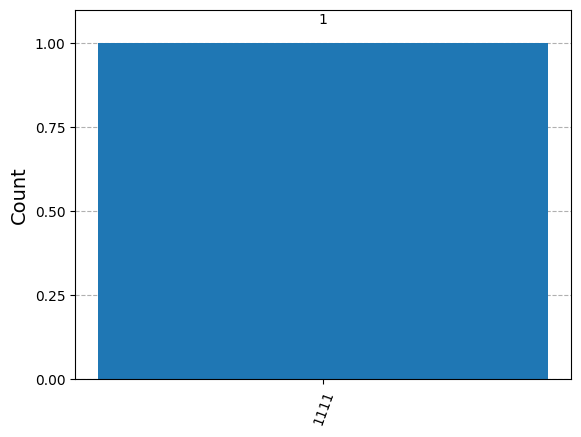

In [ ]:
# Initialize parameters
padded_result_coeffs = [
    2.84459484e-01, -1.60769035e-01, -6.52830735e-01, -1.40302564e-01,
    4.04440838e-01, -5.49152208e-02, -5.29882315e-01,  7.34968555e-16,
    0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
    0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00
]
padded_filter_vector = [
    -0.0020939558974013665, 0.04493999659839265, 0.267769868918511, 0.5812076801643039,
    0.6512469871508397, 0.39116353951309446, 0.10554509675346828, 0.014199348776285179,
    0, 0, 0, 0, 0, 0, 0, 0
]

num_qubits = int(np.log2(len(padded_result_coeffs)))
qc_test = QuantumCircuit(num_qubits * 3, num_qubits)  # Increased from num_qubits*2 to num_qubits*3 for ancilla

# Inverted initialization
qc_test.initialize(padded_result_coeffs, range(num_qubits, 2 * num_qubits))
qc_test.initialize(padded_filter_vector, range(num_qubits))

# # Append QFT and its inverse
# qc_test.append(QFT(num_qubits).to_gate(), range(num_qubits))
# qc_test.append(QFT(num_qubits).to_gate(), range(num_qubits, 2 * num_qubits))

# New code with CCX gates
qc_test.barrier()

ccx_gate = CCXGate()
for i in range(num_qubits):
    qc_test.append(ccx_gate, [i, i + num_qubits, i + 2 * num_qubits])
    qc_test.x(i)
    qc_test.x(i + num_qubits)
    qc_test.append(ccx_gate, [i, i + num_qubits, i + 2 * num_qubits])
    qc_test.x(i)
    qc_test.x(i + num_qubits)

qc_test.barrier()

for i in range(num_qubits):
    qc_test.cx(i, num_qubits + i)

# qc_test.append(QFT(num_qubits, inverse=True).to_gate(), range(num_qubits))

# Measure only the third register
qc_test.measure(range(2 * num_qubits, 3 * num_qubits), range(num_qubits))

# Clone the circuit up to the measurement step to get the statevector
qc_clone = qc_test.copy()
qc_clone.remove_final_measurements()

# Get the statevector after the gates but before measurement
state_simulator = Aer.get_backend('statevector_simulator')
statevector = Statevector.from_instruction(qc_clone)

print("\nStatevector before measurement (for the remaining qubits):")
print(statevector)

# Visualize the statevector
statevector.draw(output='latex')

# Execute the original circuit on a simulator
simulator = Aer.get_backend('qasm_simulator')

compiled_circuit = transpile(qc_test, simulator)

# Run the circuit in a loop until the desired state is obtained
desired_state = '1' * num_qubits  # All 1s in the measured register
result_counts = None

while True:
    result = simulator.run(qc_test, backend=simulator, shots=1).result()
    result_counts = result.get_counts(qc_test)

    # Debug print to understand intermediate results
    print(f"Intermediate result counts: {result_counts}")

    # Check if the desired state is obtained
    if any(state[-num_qubits:] == desired_state for state in result_counts.keys()):
        break

# Print the result
print("\nTotal count for each state are:", result_counts)

# Plot the results
plot_histogram(result_counts)


In [ ]:
# Initialize parameters
padded_result_coeffs = [
    2.84459484e-01, -1.60769035e-01, -6.52830735e-01, -1.40302564e-01,
    4.04440838e-01, -5.49152208e-02, -5.29882315e-01,  7.34968555e-16,
    0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
    0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00
]
padded_filter_vector = [
    -0.0020939558974013665, 0.04493999659839265, 0.267769868918511, 0.5812076801643039,
    0.6512469871508397, 0.39116353951309446, 0.10554509675346828, 0.014199348776285179,
    0, 0, 0, 0, 0, 0, 0, 0
]

num_qubits = int(np.log2(len(padded_result_coeffs)))
qc_test = QuantumCircuit(num_qubits * 3, num_qubits)  # Increased from num_qubits*2 to num_qubits*3 for ancilla

# Inverted initialization
qc_test.initialize(padded_result_coeffs, range(num_qubits, 2 * num_qubits))
qc_test.initialize(padded_filter_vector, range(num_qubits))

# Append QFT and its inverse
qc_test.append(QFT(num_qubits).to_gate(), range(num_qubits))
qc_test.append(QFT(num_qubits).to_gate(), range(num_qubits, 2 * num_qubits))

# New code with CCX gates
qc_test.barrier()

ccx_gate = CCXGate()
for i in range(num_qubits):
    qc_test.append(ccx_gate, [i, i + num_qubits, i + 2 * num_qubits])
    qc_test.x(i)
    qc_test.x(i + num_qubits)
    qc_test.append(ccx_gate, [i, i + num_qubits, i + 2 * num_qubits])
    qc_test.x(i)
    qc_test.x(i + num_qubits)

qc_test.barrier()

for i in range(num_qubits):
    qc_test.cx(i, num_qubits + i)

qc_test.append(QFT(num_qubits, inverse=True).to_gate(), range(num_qubits))

# Measure only the third register
qc_test.measure(range(2 * num_qubits, 3 * num_qubits), range(num_qubits))

# Clone the circuit up to the measurement step to get the statevector
qc_clone = qc_test.copy()
qc_clone.remove_final_measurements()

# Get the statevector after the gates but before measurement
state_simulator = Aer.get_backend('statevector_simulator')
statevector = Statevector.from_instruction(qc_clone)

print("\nStatevector before measurement (for the remaining qubits):")
print(statevector)

# Visualize the statevector
statevector.draw(output='latex')

# Execute the original circuit on a simulator
simulator = Aer.get_backend('qasm_simulator')

compiled_circuit = transpile(qc_test, simulator)

# Run the circuit in a loop until the desired state is obtained
desired_state = '1' * num_qubits  # All 1s in the measured register
result_counts = None

while True:
    result = simulator.run(qc_test, backend=simulator, shots=1).result()
    result_counts = result.get_counts(qc_test)

    # Debug print to understand intermediate results
    print(f"Intermediate result counts: {result_counts}")

    # Check if the desired state is obtained
    if any(state[-num_qubits:] == desired_state for state in result_counts.keys()):
        break

# Print the result
print("\nTotal count for each state are:", result_counts)

# Plot the results
plot_histogram(result_counts)



Statevector before measurement (for the remaining qubits):
Statevector([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2))


AerError: 'unknown instruction: QFT'

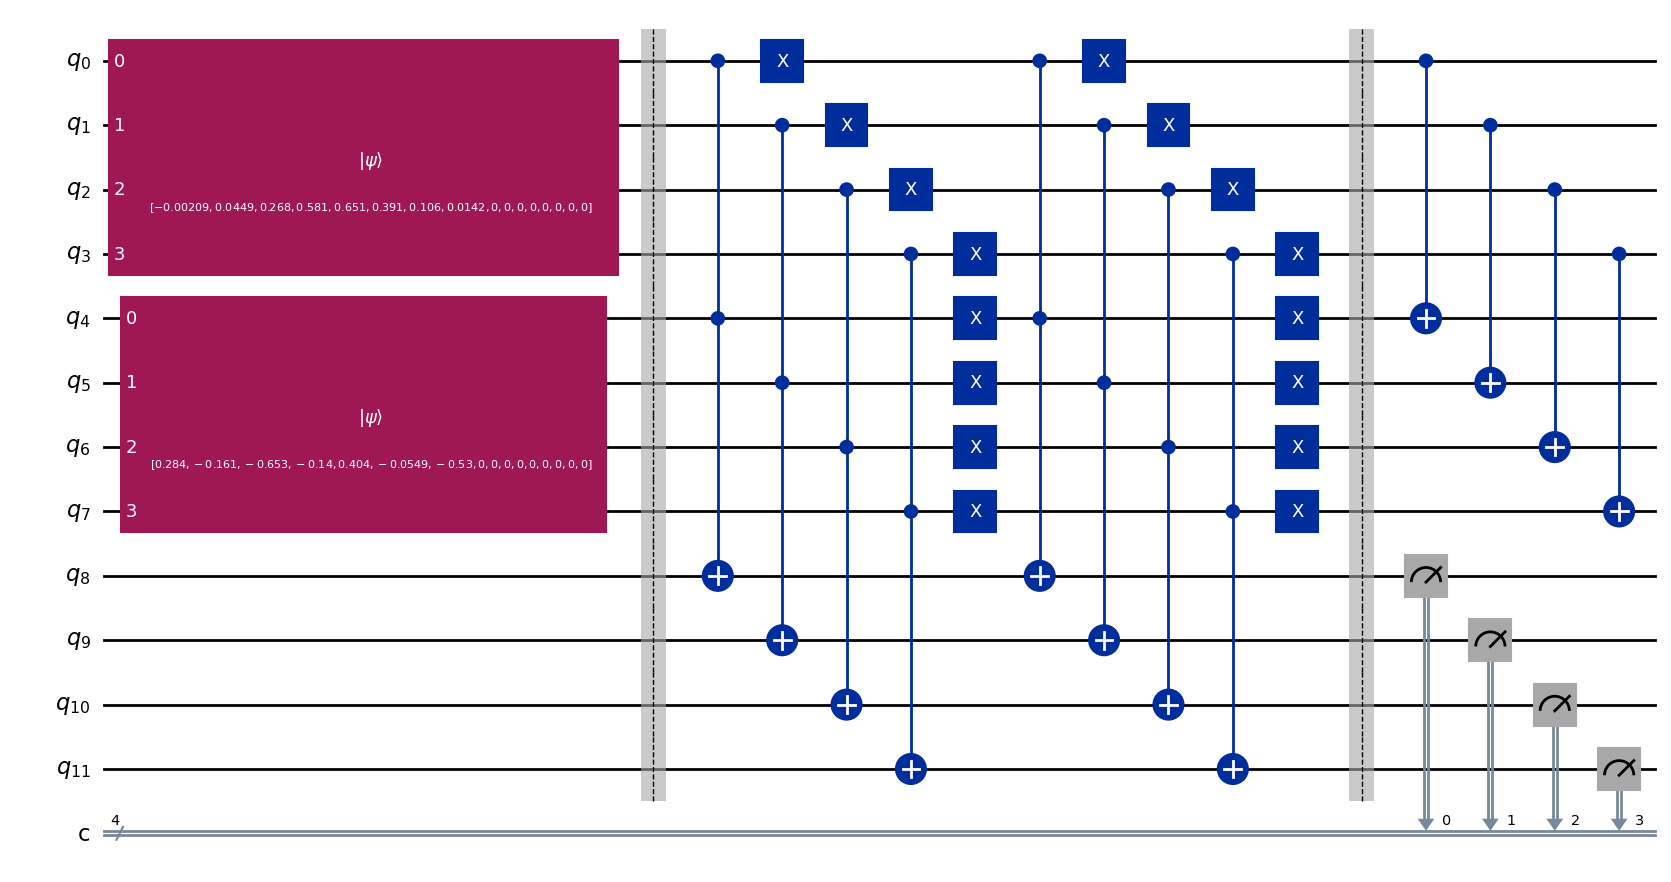

In [ ]:
qc_test.draw('mpl')



---



---



---



---



In [ ]:
import plotly.graph_objects as go

# testing windowed state prep
window_scaling= 2.0062463823972267
padded_result_coeffs= [ 2.84459484e-01, -1.60769035e-01, -6.52830735e-01, -1.40302564e-01,
  4.04440838e-01, -5.49152208e-02, -5.29882315e-01,  7.34968555e-16,
  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00]
filter_scaling= 0.48685999869309116
padded_filter_vector= [-0.0020939558974013665, 0.04493999659839265, 0.267769868918511, 0.5812076801643039, 0.6512469871508397, 0.39116353951309446, 0.10554509675346828, 0.014199348776285179, 0, 0, 0, 0, 0, 0, 0, 0]

num_qubits = int(np.log2(len(padded_result_coeffs)))
qc_test = QuantumCircuit(num_qubits * 2, num_qubits * 2)

# regular initialiazation
# qc_test.initialize(padded_result_coeffs, range(num_qubits))
# qc_test.initialize(padded_filter_vector, range(num_qubits, 2 * num_qubits))


# # inverted initilization
qc_test.initialize(padded_result_coeffs, range(num_qubits, 2 * num_qubits))
qc_test.initialize(padded_filter_vector, range(num_qubits) )

qc_test.append(QFT(num_qubits), range(num_qubits))
qc_test.append(QFT(num_qubits), range(num_qubits, 2 * num_qubits))

for i in range(num_qubits):
    qc_test.cx(i, num_qubits + i)
    # qc_test.cx(num_qubits + i, i)

qc_test.append(QFT(num_qubits, inverse=True).to_gate(), range(num_qubits))
# qc_test.append(QFT(num_qubits, inverse=True), range(num_qubits, 2 * num_qubits))
##################

qc_test.save_statevector()

simulator = Aer.get_backend('aer_simulator')
compiled_circuit_test = transpile(qc_test, simulator)
result_test = simulator.run(compiled_circuit_test).result()

statevector_test = result_test.get_statevector()

norm_test = np.linalg.norm(statevector_test)
print("norm test",norm_test)
# statevector_test /= norm_test

for i in range(0,17):
  s = i
  resulting_state_test = Statevector(statevector_test).data[s*2**num_qubits:(s+1)*2**num_qubits]

  # print("statevector = ", statevector_test)
  print("resulting_state = ", resulting_state_test)

  final_resulting_state_test = resulting_state_test * window_scaling / (filter_scaling )

  traces = []
  traces.append(go.Scatter(y=np.real(final_resulting_state_test), name="quantum final conv"))
  traces.append(go.Scatter(y=y, name="numpy conv"))
  fig = go.Figure(traces)
  fig.update_layout(title=f"quantum vs numpy overlap add at s= {s}")
  fig.show()

  print()
  scaling = y[:len(final_resulting_state_test)] / final_resulting_state_test
  print(f"scaling at s= {i} ", scaling)
  print()
